In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

<h1>Create dataset by severity</h1>

In [ ]:
df = pd.read_csv('./DataCrohnIPI/CrohnIPI_description.csv')

In [ ]:
labels = []
for i, row in df.iterrows():
    if row['Label'] == 'N':
        os.rename('./DataCrohnIPI/imgs/'+row['Frame name'], './DataCrohnIPI/normal/'+row['Frame name'])
    elif row['Label'] == 'U>10':
        labels.append('ulceration_over_10mm')
        os.rename('./DataCrohnIPI/imgs/'+row['Frame name'], './DataCrohnIPI/ulceration_over_10mm/'+row['Frame name'])
    elif row['Label'] == 'S':
        labels.append('stenosis')
        os.rename('./DataCrohnIPI/imgs/'+row['Frame name'], './DataCrohnIPI/stenosis/'+row['Frame name'])
    elif row['Label'] == 'AU':
        labels.append('aphthoid_ulceration')
        os.rename('./DataCrohnIPI/imgs/'+row['Frame name'], './DataCrohnIPI/aphthoid_ulceration/'+row['Frame name'])
    elif row['Label'] == 'U3-10':
        labels.append('ulceration_between_3mm_10mm')
        os.rename('./DataCrohnIPI/imgs/'+row['Frame name'], './DataCrohnIPI/ulceration_between_3mm_10mm/'+row['Frame name'])
    elif row['Label'] == 'O':
        labels.append('edema')
        os.rename('./DataCrohnIPI/imgs/'+row['Frame name'], './DataCrohnIPI/edema/'+row['Frame name'])
    elif row['Label'] == 'E':
        labels.append('erytheme')
        os.rename('./DataCrohnIPI/imgs/'+row['Frame name'], './DataCrohnIPI/erytheme/'+row['Frame name'])

In [ ]:
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-0-1/*.jpg'): labels.append('ulcerative-colitis-grade-0-1') 
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-1/*.jpg'): labels.append('ulcerative-colitis-grade-1')
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-1-2/*.jpg'): labels.append('ulcerative-colitis-grade-1-2')
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-2/*.jpg'): labels.append('ulcerative-colitis-grade-2')
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-2-3/*.jpg'): labels.append('ulcerative-colitis-grade-2-3')
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-3/*.jpg'): labels.append('ulcerative-colitis-grade-3')

In [ ]:
df_labels = pd.DataFrame(data={'Classes': labels,})

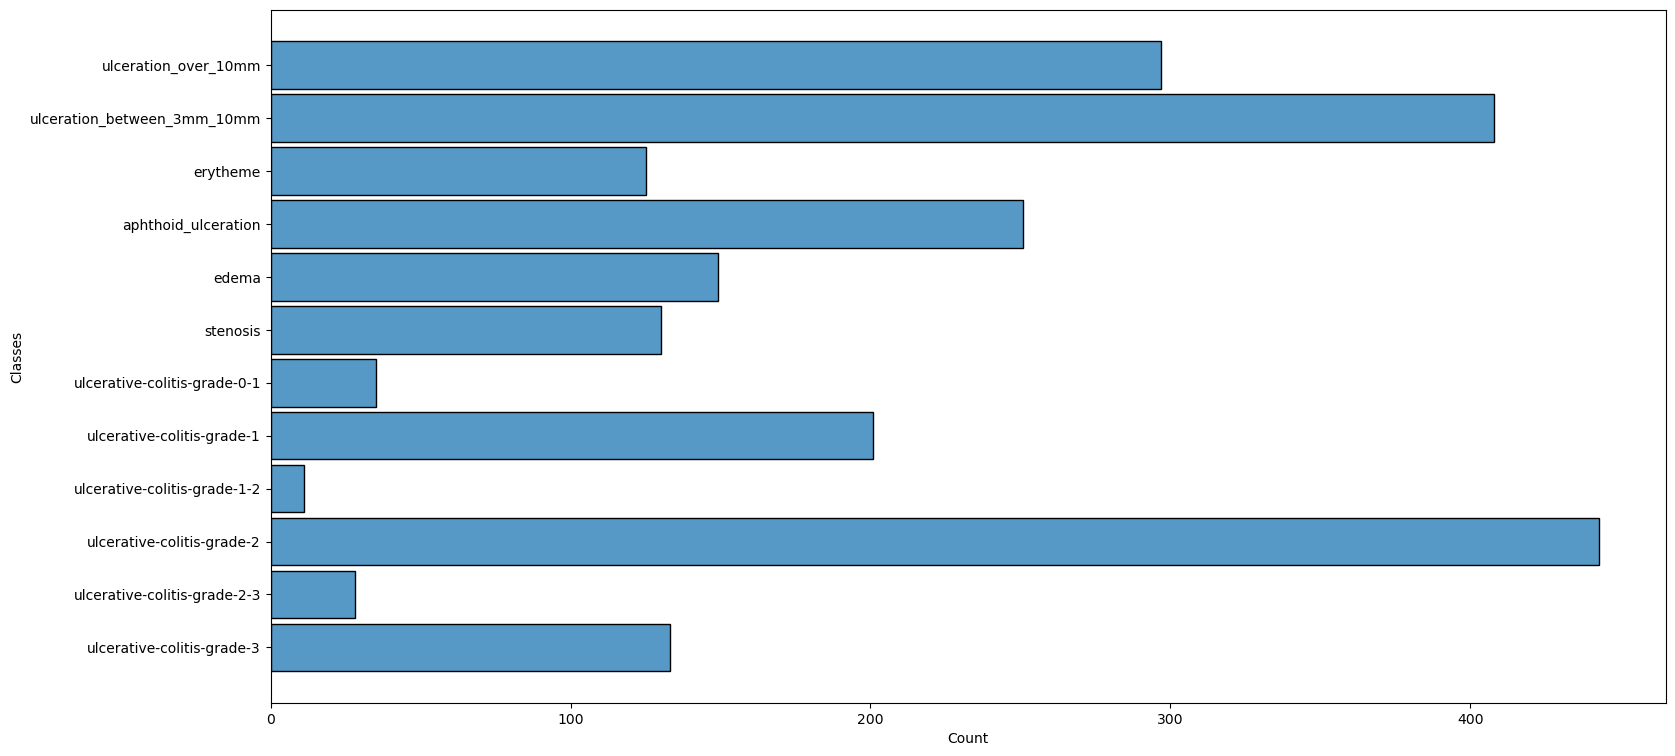

In [ ]:
plt.figure(figsize=(18, 9))
sns.histplot(data=df_labels, y='Classes', shrink=0.9);
plt.show()

<h1>Create dataset by disease</h1>

In [ ]:
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-0-1/*.jpg'): os.rename(f, './dataset_CD_UC/ulcerative-colitis/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-1/*.jpg'): os.rename(f, './dataset_CD_UC/ulcerative-colitis/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-1-2/*.jpg'): os.rename(f, './dataset_CD_UC/ulcerative-colitis/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-2/*.jpg'): os.rename(f, './dataset_CD_UC/ulcerative-colitis/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-2-3/*.jpg'): os.rename(f, './dataset_CD_UC/ulcerative-colitis/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis-grade-3/*.jpg'): os.rename(f, './dataset_CD_UC/ulcerative-colitis/'+f.split('\\')[1])

In [ ]:
for f in glob.glob('./dataset_CD_UC/ulceration_over_10mm/*.jpg'): os.rename(f, './dataset_CD_UC/crohn-disease/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/stenosis/*.jpg'): os.rename(f, './dataset_CD_UC/crohn-disease/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/aphthoid_ulceration/*.jpg'): os.rename(f, './dataset_CD_UC/crohn-disease/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/ulceration_between_3mm_10mm/*.jpg'): os.rename(f, './dataset_CD_UC/crohn-disease/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/edema/*.jpg'): os.rename(f, './dataset_CD_UC/crohn-disease/'+f.split('\\')[1])
for f in glob.glob('./dataset_CD_UC/erytheme/*.jpg'): os.rename(f, './dataset_CD_UC/crohn-disease/'+f.split('\\')[1])

In [ ]:
labels = []
for f in glob.glob('./dataset_CD_UC/ulcerative-colitis/*.jpg'): labels.append('ulcerative-colitis') 
for f in glob.glob('./dataset_CD_UC/crohn-disease/*.jpg'): labels.append('crohn-disease')

In [ ]:
df_labels = pd.DataFrame(data={'Classes': labels,})

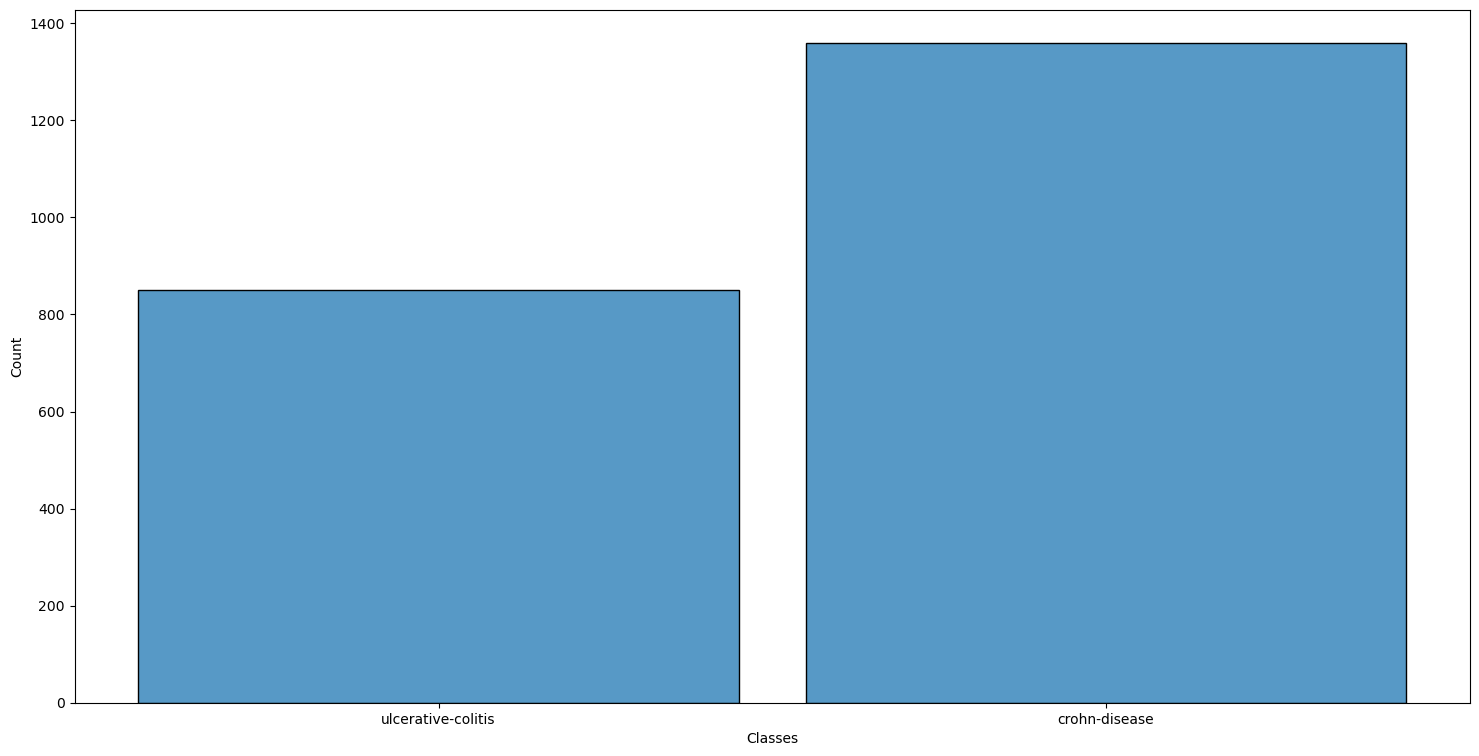

In [ ]:
plt.figure(figsize=(18, 9))
sns.histplot(data=df_labels, x='Classes', shrink=0.9);
plt.show()

<h1>Select labelled videos</h1>

In [ ]:
dfVideos = pd.read_csv('./hyper-kvasir-videos/video-annotations.csv', sep=';')

In [ ]:
videosSelected = dfVideos[dfVideos['finding'] == 'ulcerative colitis']
videosSelected

,videoID,finding
365,fc79c489-b358-4368-b965-330615af73d4,ulcerative colitis
366,9bdfbfa0-7497-40cb-8a71-d4ed5279ad49,ulcerative colitis


In [ ]:
for index, f in videosSelected['videoID'].items():
    os.rename('./hyper-kvasir-videos/videos/'+f+".avi", './frames/'+f+".avi")

<h1>Convert BMP images to JPG images #1</h1>

In [ ]:
for f in glob.glob('./LIMUC_1/Mayo0/*.bmp'):
    img = Image.open(f)
    img.save('./uc_1/'+f.split('\\')[1].split('.')[0]+'.jpg')

In [ ]:
for f in glob.glob('./LIMUC_1/Mayo1/*.bmp'):
    img = Image.open(f)
    img.save('./uc_1/'+f.split('\\')[1].split('.')[0]+'.jpg')

In [ ]:
for f in glob.glob('./LIMUC_1/Mayo2/*.bmp'):
    img = Image.open(f)
    img.save('./uc_1/'+f.split('\\')[1].split('.')[0]+'.jpg')

In [ ]:
for f in glob.glob('./LIMUC_1/Mayo3/*.bmp'):
    img = Image.open(f)
    img.save('./uc_1/'+f.split('\\')[1].split('.')[0]+'.jpg')

<h1>Convert BMP images to JPG images #2</h1>

In [ ]:
for f in glob.glob('./LIMUC_2/Mayo0/*.bmp'):
    img = Image.open(f)
    img.save('./uc_2/'+f.split('\\')[1].split('.')[0]+'.jpg')

In [ ]:
for f in glob.glob('./LIMUC_2/Mayo1/*.bmp'):
    img = Image.open(f)
    img.save('./uc_2/'+f.split('\\')[1].split('.')[0]+'.jpg')

In [ ]:
for f in glob.glob('./LIMUC_2/Mayo2/*.bmp'):
    img = Image.open(f)
    img.save('./uc_2/'+f.split('\\')[1].split('.')[0]+'.jpg')

In [ ]:
for f in glob.glob('./LIMUC_2/Mayo3/*.bmp'):
    img = Image.open(f)
    img.save('./uc_2/'+f.split('\\')[1].split('.')[0]+'_2.jpg')